In [20]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [21]:
train_path="/content/drive/MyDrive/dataset/train"
validation_path="/content/drive/MyDrive/dataset/validation"
test_path="/content/drive/MyDrive/dataset/test"

In [22]:
train_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(train_path, target_size=(224,224), batch_size=32)
validation_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(validation_path, target_size=(224,224), batch_size=32)
test_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(test_path, target_size=(224,224), batch_size=32, shuffle=False)

Found 350 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [23]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(include_top=False,
                                               weights= 'imagenet',
                                               input_shape = IMG_SHAPE)

In [ ]:
base_model.summary()

In [ ]:
base_model.trainable=False
base_model.summary()

In [46]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
preds = Dense(5, activation='softmax')(x)

model=Model(inputs=base_model.input, outputs=preds)

In [47]:
epochs = 10
optimizer=Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [49]:
history = model.fit(train_batches, validation_data=validation_batches, epochs=epochs)

Epoch 1/10
11/11 [==============================] - 22s 2s/step - loss: 1.5873 - accuracy: 0.3314 - val_loss: 1.0247 - val_accuracy: 0.7700
Epoch 2/10
11/11 [==============================] - 21s 2s/step - loss: 0.8688 - accuracy: 0.7457 - val_loss: 0.5334 - val_accuracy: 0.9200
Epoch 3/10
11/11 [==============================] - 20s 2s/step - loss: 0.4906 - accuracy: 0.9429 - val_loss: 0.3289 - val_accuracy: 0.9600
Epoch 4/10
11/11 [==============================] - 20s 2s/step - loss: 0.3067 - accuracy: 0.9486 - val_loss: 0.2276 - val_accuracy: 0.9500
Epoch 5/10
11/11 [==============================] - 20s 2s/step - loss: 0.2147 - accuracy: 0.9857 - val_loss: 0.1707 - val_accuracy: 0.9700
Epoch 6/10
11/11 [==============================] - 20s 2s/step - loss: 0.1464 - accuracy: 0.9943 - val_loss: 0.1399 - val_accuracy: 0.9700
Epoch 7/10
11/11 [==============================] - 25s 2s/step - loss: 0.1212 - accuracy: 0.9857 - val_loss: 0.1179 - val_accuracy: 0.9700
Epoch 8/10
11/11 [==

In [50]:
test_labels = test_batches.classes
preds = model.predict(test_batches, verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=preds.argmax(axis=1))
test_batches.class_indices

{'chinesemoneyplant': 0,
 'dragontree': 1,
 'orchid': 2,
 'rubberplant': 3,
 'snakeplant': 4}

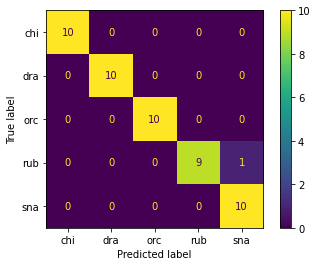

In [51]:
cm_plot_labels = ['chi', 'dra', 'orc', 'rub', 'sna']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)
disp.plot()

In [52]:
model.evaluate(test_batches, verbose=2)

2/2 - 2s - loss: 0.0842 - accuracy: 0.9800 - 2s/epoch - 1s/step


[0.08420682698488235, 0.9800000190734863]

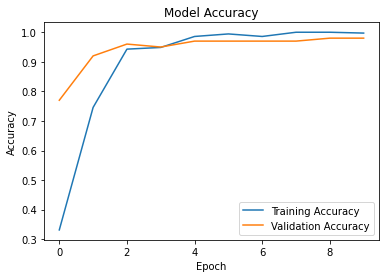

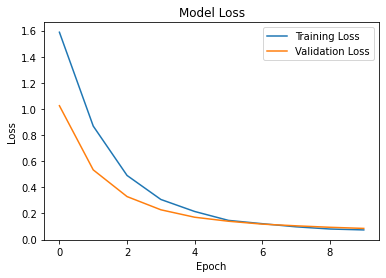

In [54]:
# Plot model performance 
import matplotlib.pylab as plt
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(acc, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')
plt.show()